<div align="left">
<p><img alt="Sapiencia" height="140px" src="https://ubicua.ingeniaudea.co/pluginfile.php/32974/coursecat/description/RF_RedesNeuronales.png" align="left" hspace="10px" vspace="0px"></p></div>
<div align="left"></div>
<div>

<br></br>

<div align="left">
<br></br>
<br></br>



<hr size=10 noshade color="#663398">
</p>

<div align="right">
<h1> <b> Trabajo final redes neuronales </b> </h1>
<br>


**El presente material hace parte de la ruta de formación del talento especializado de SAPIENCIA**

**Los documentos que utilizaremos en la presente y proximas clases son una mezcla del trabajo de muchos profesores y académicos.**

**En caso de utilizar el presente contenido favor citarlo y brindar los créditos respectivos.**

#**Descripción trabajo final**

<p>
  1. Analizar el código paso a paso y entenderlo y realizar una breve explicación de como funciona.<br>
  2. Realizar módificaciones variando parámetros como la cantidad de neuronas, tipo de optimizador, funciones de activación, funciones de perdida y tamaños de entrada de la imagen.<br>
  3. A partir del entendimiento del código en el punto 1 responda las siguientes preguntas: <br>
  <ul>
    <li> ¿Cual es el objetivo de categorizar los targets o labels correspondientes a cada imagen? </li>
    <li> ¿En que me ayuda la normalización a la hora de entrenar los datos? </li>
  </ul>
  <p>
  4. Realice un informe detallando los resultados obtenidos en el punto 2. El informe debe responder las siguiente preguntas:
  <ul>
    <li> ¿Cómo variaron los resultados con el aumento o disminución de las neuronas?</li>
    <li> ¿Cómo cambia la presición del modelo propuesto, al cambiar la función de activación, que se logra observar de los resultados?</li>
    <li> ¿Cuál sería a su criterio la función de activación que se adapta al presente análisis ?</li>
    <li> ¿Cómo se comportaron los resultados de las funciones de perdidas analizadas?</li>
    <li> ¿Mejoraron los resultados al reducir o aumentar el tamaño de entrada de la imagen?</li>
    <li> ¿Cuál fue la mejor solución que logró encontrar y por qué?</li>

  </ul>

  Nota: El informe debe llevar los valores que probaron en el módelo y para lo cuál como minimo se deben analizar 4 optimizadores,4 funciones de activación, 4 funciones de perdida, 4 opciones de neuronas y tamaños de entrada de la imagen. <br>
<p>
  5. Concluir en que casos se debe utilizar los optimizadores,funciones de perdida, funciones de activación y tener en cuenta que se debe presentar una gráfica representativa de cada función de activación describiendo los rangos de la función y su comportamiento.
</p>

##**Porcentajes de calificación:**


1.   Punto 1 : 10%
2.   Punto 2 : 10%
3.   Punto 3 : 10%
4.   Punto 4 : 25%
5.   Punto 5 : 15%
6.   Sustentación : 30%


##**Limitantes**
   Grupos máximo de 3 personas y mínimo de 2 personas


---

In [ ]:
pip install tensorflow

In [ ]:
pip install keras





In [ ]:
import numpy as np
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
(train_data, train_labels), (test_data, test_labels) =mnist.load_data()
# Aplana las imágenes y conviértelas en un DataFrame
train_data_flattened = train_data.reshape(train_data.shape[0], -1)
train_data_df = pd.DataFrame(train_data_flattened)

In [ ]:
train_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
train_data_df.head(10)

0    1    2    3    4    5    6    7    8    9    ...  774  775  776  777  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
5    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
6    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
7    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
8    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
9    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   778  779  780  781  782  783  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  
5    0    0    0    0    0    0  
6    0    0    0    0    0    0  
7    0    0    0    0    0    0  
8    0    0    0    0    0    0  
9    0    0    0    0    0    0  

[10 rows x 784 columns]

In [ ]:
train_data_df.shape

(60000, 784)

In [ ]:
train_data.shape

(60000, 28, 28)

In [ ]:
train_data_df[0]

0        0
1        0
2        0
3        0
4        0
        ..
59995    0
59996    0
59997    0
59998    0
59999    0
Name: 0, Length: 60000, dtype: uint8

In [ ]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

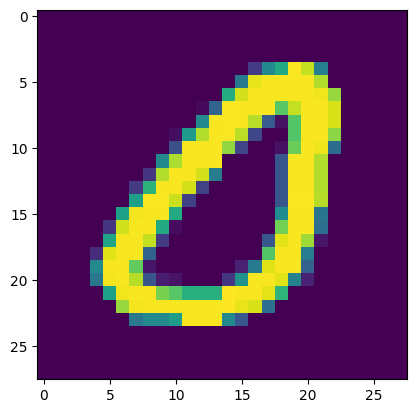

In [ ]:
plt.imshow(train_data[689])

In [ ]:
train_labels[689]

0

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
x_train = train_data_df
#x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [ ]:
x_train[0]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
59995    0.0
59996    0.0
59997    0.0
59998    0.0
59999    0.0
Name: 0, Length: 60000, dtype: float32

In [ ]:
y_train = to_categorical(train_labels)
y_test =to_categorical(test_labels)

In [ ]:
train_labels[0]

5

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
tensorboardDenso = TensorBoard(log_dir ='logs/denso')

In [ ]:
history = model.fit(x_train, y_train, epochs=20,callbacks=[tensorboardDenso], batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 4s 6ms/step - loss: 0.2612 - accuracy: 0.9255 - precision: 0.9532 - val_loss: 0.1320 - val_accuracy: 0.9612 - val_precision: 0.9697
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1058 - accuracy: 0.9690 - precision: 0.9752 - val_loss: 0.0915 - val_accuracy: 0.9720 - val_precision: 0.9772
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0698 - accuracy: 0.9793 - precision: 0.9826 - val_loss: 0.0701 - val_accuracy: 0.9768 - val_precision: 0.9808
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0507 - accuracy: 0.9847 - precision: 0.9869 - val_loss: 0.0722 - val_accuracy: 0.9769 - val_precision: 0.9803
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0386 - accuracy: 0.9889 - precision: 0.9904 - val_loss: 0.0612 - val_accuracy: 0.9815 - val_precision: 0.9834
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - lo

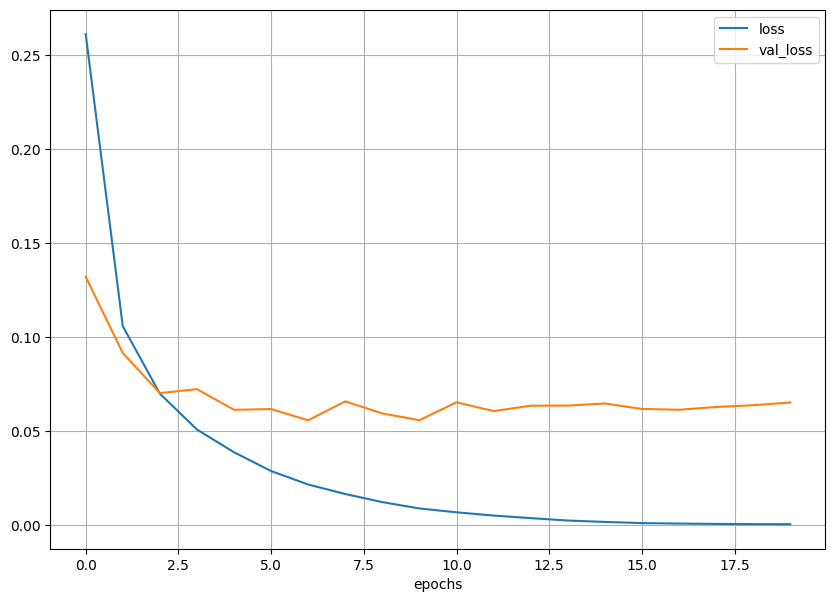

In [ ]:


pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0651 - accuracy: 0.9849 - precision: 0.9856


[0.06512981653213501, 0.9848999977111816, 0.9855899214744568]

In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
 %reload_ext tensorboard

In [ ]:
%tensorboard --logdir logs


<IPython.core.display.Javascript object>

In [ ]:
!kill 8369